In [4]:
!pip install qiskit_aer

  Obtaining dependency information for qiskit_aer from https://files.pythonhosted.org/packages/a3/4a/f40f4655010b104e4e98a89f13e960fb6f02f2b2ceb6ecf73762bce86d22/qiskit_aer-0.15.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB 320.0 kB/s eta 0:00:30
   ---------------------------------------- 0.0/9.5 MB 326.8 kB/s eta 0:00:29
   ---------------------------------------- 0.1/9.5 MB 491.5 kB/s eta 0:00:20
    --------------------------------------- 0.1/9.5 MB 653.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.5 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.5 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.5 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/9.5 MB 1.6 MB/s eta 0:00:06
   --- ------------------------

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
import numpy as np
import random
import math

In [34]:
qubit = QuantumRegister(1,"Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1,"B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")
#let the name of our circuit be 'protocol'
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)
#preparing ebit for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

#alice apply the operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

#alice measure and send clasical bits to bob
protocol.measure(qubit,b)
protocol.measure(ebit0,a)
protocol.barrier()

#bob apply the operation after checking
#since the if_test function returns an handle we use with block
with protocol.if_test((a,1)):
    protocol.x(ebit1)
with protocol.if_test((b,1)):
    protocol.z(ebit1)
display(protocol.draw())


░      ┌───┐ ░ ┌─┐    ░                                     »
  Q: ───────────░───■──┤ H ├─░─┤M├────░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╬══╩════╡ 0x1 ╞═══════════════════╬═════════»
                                ║  0    └─────┘                ┌──╨──┐      »
b: 1/═══════════════════════════╩══════════════════════════════╡ 0x1 ╞══════»
                                0                              └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [35]:
pi = math.pi
random_gate = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random()* 2* pi,
    lam = random.random() * 2* pi
)
display(random_gate.to_matrix())

array([[-0.47086356+0.j        , -0.79713538+0.37797181j],
       [ 0.88072039-0.05117714j, -0.41303914+0.22607779j]])

In [36]:
help(QuantumCircuit.if_test)

Help on function if_test in module qiskit.circuit.quantumcircuit:

if_test(self, condition, true_body=None, qubits=None, clbits=None, *, label=None)
    Create an ``if`` statement on this circuit.
    
    There are two forms for calling this function.  If called with all its arguments (with the
    possible exception of ``label``), it will create a
    :obj:`~qiskit.circuit.IfElseOp` with the given ``true_body``, and there will be
    no branch for the ``false`` condition (see also the :meth:`.if_else` method).  However, if
    ``true_body`` (and ``qubits`` and ``clbits``) are *not* passed, then this acts as a context
    manager, which can be used to build ``if`` statements.  The return value of the ``with``
    statement is a chainable context manager, which can be used to create subsequent ``else``
    blocks.  In this form, you do not need to keep track of the qubits or clbits you are using,
    because the scope will handle it for you.
    
    For example::
    
        from qis

In [44]:
#applying the random gate to  qubit Q
#teleportation protocol
#we have created a testingcircuit which will test the teleportation circuit drawn above

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)
test.x(qubit)
test.append(random_gate,qubit)
test.barrier()
#appending entire teleportation circuit
#the circuit beign composed should have less or same no of inputs as 'test' circuit here
test = test.compose(protocol)
test.barrier()
#applying the inverse gate to Bob's one to complare the output
test.append(random_gate.inverse(), ebit1)
#register to store result
result = ClassicalRegister(1,"result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌───┐┌─────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   »
       Q: ┤ X ├┤ U(4.1221,6.2251,5.8404) ├─░────────────░───■──┤ H ├─░─┤M├───»
          └───┘└─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐»
       A: ─────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├»
                                           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘»
       B: ─────────────────────────────────░──────┤ X ├─░────────────░──╫──╫─»
                                           ░      └───┘ ░            ░  ║  ║ »
     a: 1/══════════════════════════════════════════════════════════════╬══╩═»
                                                                        ║  0 »
     b: 1/══════════════════════════════════════════════════════════════╩════»
                                                                        0    »
result: 1/═══════════════════════════════════════════════════════════════════»
                                                                             »
«           ░                                                ░ »
«       Q: ─░────────────────────────────────────────────────░─»
«           ░                                                ░ »
«       A: ─░────────────────────────────────────────────────░─»
«           ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ─░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«           ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«             ┌──╨──┐                   ║                      »
«     a: 1/═══╡ 0x1 ╞═══════════════════╬══════════════════════»
«             └─────┘                ┌──╨──┐                   »
«     b: 1/══════════════════════════╡ 0x1 ╞═══════════════════»
«                                    └─────┘                   »
«result: 1/════════════════════════════════════════════════════»
«                                                              »
«                                           
«       Q: ─────────────────────────────────
«                                           
«       A: ─────────────────────────────────
«          ┌────────────────────────────┐┌─┐
«       B: ┤ U(-4.1221,-5.8404,-6.2251) ├┤M├
«          └────────────────────────────┘└╥┘
«     a: 1/═══════════════════════════════╬═
«                                         ║ 
«     b: 1/═══════════════════════════════╬═
«                                         ║ 
«result: 1/═══════════════════════════════╩═
«                                         0

{'1 0 0': 254, '1 1 1': 230, '1 0 1': 265, '1 1 0': 275}

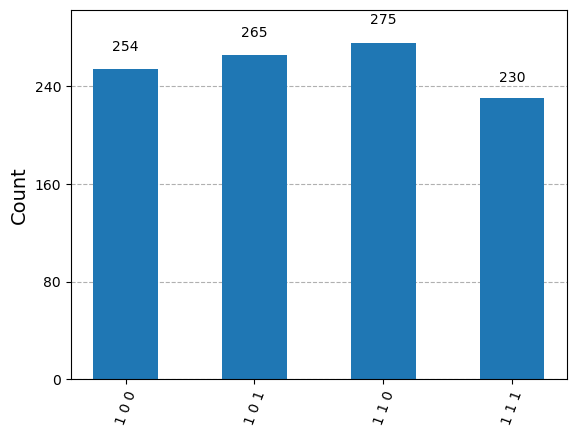

In [45]:
#using Aer Simulator this time to run the circuit
result = AerSimulator().run(test).result()
stats = result.get_counts()
display(stats)
display(plot_histogram(stats))